In [1]:
import scipy.io as so
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedShuffleSplit
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import cv2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

pd.options.display.max_rows=100

In [2]:
#load data

mat=so.loadmat('project_data.mat')
x_train=mat['x_train']
x_test=mat['x_test']
y_train_label=mat['y_train'].flatten()
y_test_label=mat['y_test'].flatten()

# convert y to categorical
y_train = to_categorical(y_train_label, num_classes=30)
y_test = to_categorical(y_test_label, num_classes=30)

#load mapping table
mapping_dict = {
    'defective_bottle': 0,
    'defect_free_bottle': 1,
    'defective_cable': 2,
    'defect_free_cable': 3,
    'defective_capsule': 4,
    'defect_free_capsule': 5,
    'defective_carpet': 6,
    'defect_free_carpet': 7,
    'defective_grid': 8,
    'defect_free_grid': 9,
    'defective_hazelnut': 10,
    'defect_free_hazelnut': 11,
    'defective_leather': 12,
    'defect_free_leather': 13,
    'defective_metal_nut': 14,
    'defect_free_metal_nut': 15,
    'defective_pill': 16,
    'defect_free_pill': 17,
    'defective_screw': 18,
    'defect_free_screw': 19,
    'defective_tile': 20,
    'defect_free_tile': 21,
    'defective_toothbrush': 22,
    'defect_free_toothbrush': 23,
    'defective_transistor': 24,
    'defect_free_transistor': 25,
    'defective_wood': 26,
    'defect_free_wood': 27,
    'defective_zipper': 28,
    'defect_free_zipper': 29
}

Deep CNN without PCA

In [3]:
# it takes hours to train deep cnn on the whole dataset, so I simply load previously trained & saved model
from tensorflow.keras.models import load_model
loaded_keras_model = load_model('best_keras_model.h5')

34/34 [==============================] - 1s 35ms/step


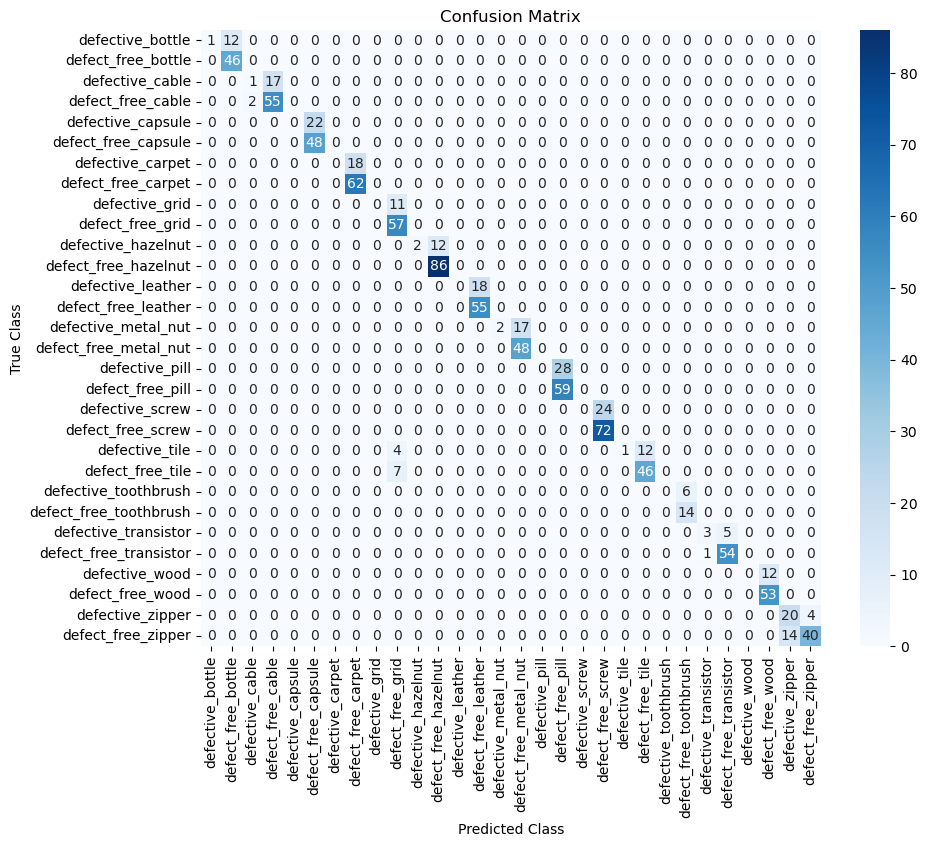

In [5]:
#plot confusion matrix
y_pred = loaded_keras_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=mapping_dict.keys(), yticklabels=mapping_dict.keys())
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

In [5]:
#display classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=mapping_dict.keys() ,output_dict=True)
report=pd.DataFrame(report).transpose()
report

c:\Users\Derek Duan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Derek Duan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Derek Duan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
defective_bottle,1.000000,0.076923,0.142857,13.000000
defect_free_bottle,0.793103,1.000000,0.884615,46.000000
defective_cable,0.333333,0.055556,0.095238,18.000000
defect_free_cable,0.763889,0.964912,0.852713,57.000000
defective_capsule,0.000000,0.000000,0.000000,22.000000
defect_free_capsule,0.685714,1.000000,0.813559,48.000000
defective_carpet,0.000000,0.000000,0.000000,18.000000
defect_free_carpet,0.775000,1.000000,0.873239,62.000000
defective_grid,0.000000,0.000000,0.000000,11.000000
defect_free_grid,0.721519,1.000000,0.838235,57.000000


In [6]:
precision = precision_score(y_true_classes, y_pred_classes, average='macro')
recall = recall_score(y_true_classes, y_pred_classes, average='macro')
f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

c:\Users\Derek Duan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.5780408527885164
Recall: 0.5401050509179391
F1 Score: 0.49550452569421083


In [12]:
mapping_dict_inv = {
    0: 'defective_bottle', 1: 'defect_free_bottle', 2: 'defective_cable', 3: 'defect_free_cable',
    4: 'defective_capsule', 5: 'defect_free_capsule', 6: 'defective_carpet', 7: 'defect_free_carpet',
    8: 'defective_grid', 9: 'defect_free_grid', 10: 'defective_hazelnut', 11: 'defect_free_hazelnut',
    12: 'defective_leather', 13: 'defect_free_leather', 14: 'defective_metal_nut', 15: 'defect_free_metal_nut',
    16: 'defective_pill', 17: 'defect_free_pill', 18: 'defective_screw', 19: 'defect_free_screw',
    20: 'defective_tile', 21: 'defect_free_tile', 22: 'defective_toothbrush', 23: 'defect_free_toothbrush',
    24: 'defective_transistor', 25: 'defect_free_transistor', 26: 'defective_wood', 27: 'defect_free_wood',
    28: 'defective_zipper', 29: 'defect_free_zipper'
}

In [13]:
defective_classes = [i for i in range(0, 30, 2)] 
y_true_defective = np.where(np.isin(y_test_label, defective_classes), y_test_label, -1)  

y_true_filtered=y_true_defective[~np.isin(y_true_defective, -1)]
y_pred_filtered=y_pred_classes[~np.isin(y_true_defective, -1)]


In [14]:
# Calculate accuracy
accuracy = accuracy_score(y_true_filtered, y_pred_filtered)
print(f"the accuracy score for defective classes is: {accuracy:.2%}")

precision = precision_score(y_true_filtered, y_pred_filtered, average='macro')
recall = recall_score(y_true_filtered, y_pred_filtered, average='macro')
f1 = f1_score(y_true_filtered, y_pred_filtered, average='macro')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

the accuracy score for defective classes is: 11.90%
Precision: 0.23333333333333334
Recall: 0.05492519319918701
F1 Score: 0.0751417685628212


c:\Users\Derek Duan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Derek Duan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Calculate precision for each class in y_true_filtered array only
precision = precision_score(y_true_filtered, y_pred_filtered, average=None, labels=np.unique(y_true_filtered))

# Calculate recall for each class in y_true_filtered array only
recall = recall_score(y_true_filtered, y_pred_filtered, average=None, labels=np.unique(y_true_filtered))

# Calculate F1 score for each class in y_true_filtered array only
f1 = f1_score(y_true_filtered, y_pred_filtered, average=None, labels=np.unique(y_true_filtered))

results_df = pd.DataFrame({
     "Class": [mapping_dict_inv[i] for i in np.unique(y_true_filtered)],
     "Precision": precision,
     "Recall": recall,
     "F1 Score": f1
})

pd.DataFrame(results_df)

c:\Users\Derek Duan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Class,Precision,Recall,F1 Score
0,defective_bottle,1.0,0.076923,0.142857
1,defective_cable,1.0,0.055556,0.105263
2,defective_capsule,0.0,0.000000,0.000000
3,defective_carpet,0.0,0.000000,0.000000
4,defective_grid,0.0,0.000000,0.000000
5,defective_hazelnut,1.0,0.142857,0.250000
6,defective_leather,0.0,0.000000,0.000000
7,defective_metal_nut,1.0,0.105263,0.190476
8,defective_pill,0.0,0.000000,0.000000
9,defective_screw,0.0,0.000000,0.000000


Deep CNN with PCA

In [51]:
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_flat)
x_test_scaled = scaler.transform(x_test_flat)

In [52]:
pca = PCA(n_components=0.95)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

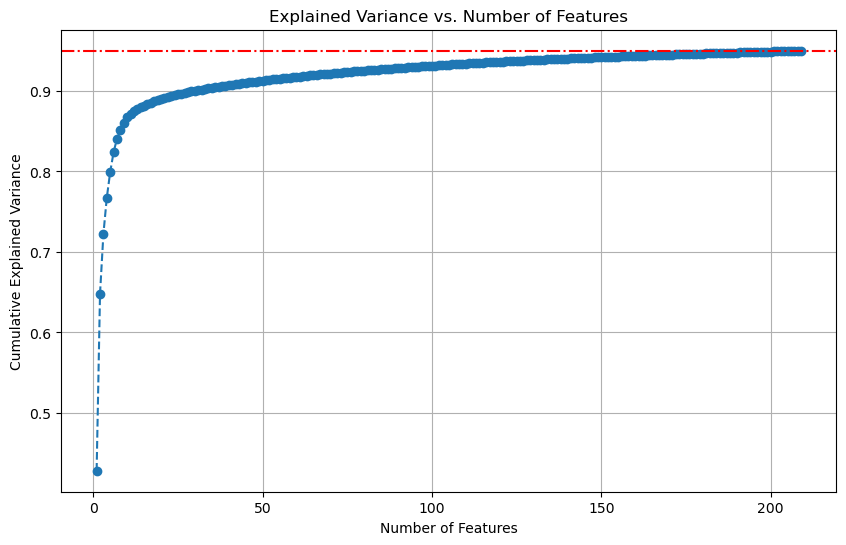

In [55]:
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the relationship between explained variation and feature number
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.axhline(y=[0.95], color='r', linestyle='-.')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Features')
plt.grid()
plt.show()

In [9]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(x_train_pca.shape[1],)))  # Adjust input shape based on PCA output
model.add(Dropout(0.3))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(30, activation='softmax')) 
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_pca, y_train, epochs=10, batch_size=16, validation_data=(x_test_pca, y_test))

Epoch 1/10
268/268 [==============================] - 2s 3ms/step - loss: 2.8404 - accuracy: 0.4896 - val_loss: 0.8643 - val_accuracy: 0.7236
Epoch 2/10
268/268 [==============================] - 1s 3ms/step - loss: 1.0742 - accuracy: 0.6507 - val_loss: 0.6143 - val_accuracy: 0.7395
Epoch 3/10
268/268 [==============================] - 1s 3ms/step - loss: 0.8188 - accuracy: 0.6878 - val_loss: 0.6034 - val_accuracy: 0.7040
Epoch 4/10
268/268 [==============================] - 1s 3ms/step - loss: 0.6883 - accuracy: 0.7180 - val_loss: 0.5237 - val_accuracy: 0.7666
Epoch 5/10
268/268 [==============================] - 1s 3ms/step - loss: 0.6154 - accuracy: 0.7315 - val_loss: 0.5816 - val_accuracy: 0.7246
Epoch 6/10
268/268 [==============================] - 1s 3ms/step - loss: 0.6044 - accuracy: 0.7418 - val_loss: 0.5300 - val_accuracy: 0.7647
Epoch 7/10
268/268 [==============================] - 1s 3ms/step - loss: 0.5725 - accuracy: 0.7602 - val_loss: 0.5438 - val_accuracy: 0.7628
Epoch 

34/34 [==============================] - 0s 1ms/step


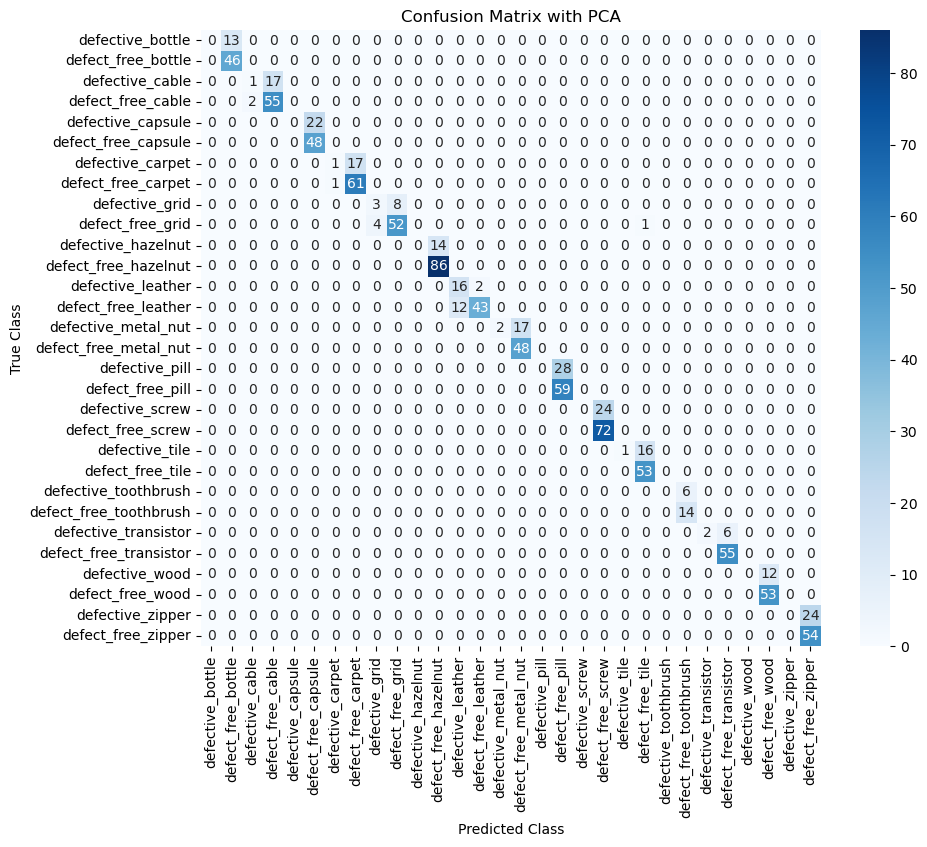

In [11]:
y_pred_pca = model.predict(x_test_pca)
y_pred_classes_pca = np.argmax(y_pred_pca, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes_pca)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=mapping_dict.keys(), yticklabels=mapping_dict.keys())
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix with PCA')
plt.show()

In [12]:
report = classification_report(y_true_classes, y_pred_classes_pca, target_names=mapping_dict.keys() ,output_dict=True)
report=pd.DataFrame(report).transpose()
report

c:\Users\Derek Duan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Derek Duan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Derek Duan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
defective_bottle,0.000000,0.000000,0.000000,13.000000
defect_free_bottle,0.779661,1.000000,0.876190,46.000000
defective_cable,0.333333,0.055556,0.095238,18.000000
defect_free_cable,0.763889,0.964912,0.852713,57.000000
defective_capsule,0.000000,0.000000,0.000000,22.000000
defect_free_capsule,0.685714,1.000000,0.813559,48.000000
defective_carpet,0.500000,0.055556,0.100000,18.000000
defect_free_carpet,0.782051,0.983871,0.871429,62.000000
defective_grid,0.428571,0.272727,0.333333,11.000000
defect_free_grid,0.866667,0.912281,0.888889,57.000000


Deep CNN with edge detection features

In [3]:
def edge_detection(images, threshold):
    from skimage import filters
    edge_detected_images = []
    for img in images:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        edges = filters.sobel(gray)
        edges = (edges > threshold).astype(int)
        edge_detected_images.append(edges)
    return np.array(edge_detected_images)


x_train_edges = edge_detection(x_train,0.085)
x_test_edges = edge_detection(x_test,0.085)

In [4]:
x_train_edges = x_train_edges.reshape(x_train_edges.shape[0], 128, 128, 1)
x_test_edges = x_test_edges.reshape(x_test_edges.shape[0], 128, 128, 1)

x_train_combined = np.concatenate([x_train, x_train_edges], axis=-1)
x_test_combined = np.concatenate([x_test, x_test_edges], axis=-1)

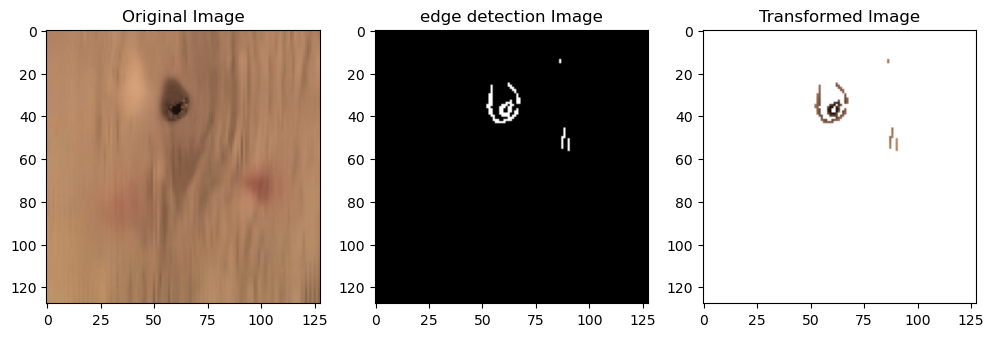

In [97]:
plt.figure(figsize=(12,5))
i=510

plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(x_test[i],cmap='gray')

plt.subplot(1,3,2)
plt.title("edge detection Image")
plt.imshow(x_test_edges[i],cmap='gray')

plt.subplot(1,3,3)
plt.title("Transformed Image")
plt.imshow(x_test_combined[i],cmap='gray')

plt.show()

In [98]:
model_combined = Sequential()

model_combined.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 4)))
model_combined.add(MaxPooling2D((2, 2)))
model_combined.add(Conv2D(64, (3, 3), activation='relu'))
model_combined.add(MaxPooling2D((2, 2)))
model_combined.add(Conv2D(128, (3, 3), activation='relu'))
model_combined.add(MaxPooling2D((2, 2)))

model_combined.add(Flatten())
model_combined.add(Dense(128, activation='relu'))
model_combined.add(Dropout(0.3))
model_combined.add(Dense(30, activation='softmax'))

model_combined.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model_combined.fit(x_train_combined, y_train, epochs=10, batch_size=16, validation_data=(x_test_combined, y_test))

Epoch 1/10
268/268 [==============================] - 34s 122ms/step - loss: 1.1454 - accuracy: 0.6176 - val_loss: 0.6101 - val_accuracy: 0.7404
Epoch 2/10
268/268 [==============================] - 33s 124ms/step - loss: 0.6546 - accuracy: 0.7308 - val_loss: 0.5503 - val_accuracy: 0.7684
Epoch 3/10
268/268 [==============================] - 31s 116ms/step - loss: 0.5697 - accuracy: 0.7658 - val_loss: 0.4996 - val_accuracy: 0.7899
Epoch 4/10
268/268 [==============================] - 30s 111ms/step - loss: 0.4983 - accuracy: 0.7894 - val_loss: 0.5191 - val_accuracy: 0.7806
Epoch 5/10
268/268 [==============================] - 29s 109ms/step - loss: 0.4750 - accuracy: 0.7985 - val_loss: 0.4945 - val_accuracy: 0.7899
Epoch 6/10
268/268 [==============================] - 29s 109ms/step - loss: 0.4301 - accuracy: 0.8170 - val_loss: 0.4615 - val_accuracy: 0.7965
Epoch 7/10
268/268 [==============================] - 29s 108ms/step - loss: 0.4157 - accuracy: 0.8221 - val_loss: 0.4696 - val_ac

In [103]:
#save egde detection dataset
so.savemat('data_with_edge_detection.mat', {
    'x_train': x_train_combined,
    'x_test': x_test_combined,
    'y_train': y_train_label,
    'y_test': y_test_label
})

In [100]:
#save model 
model_combined.save('model_with_edge_detection.h5')

In [9]:
model_combined = load_model('model_with_edge_detection.h5')

34/34 [==============================] - 2s 48ms/step


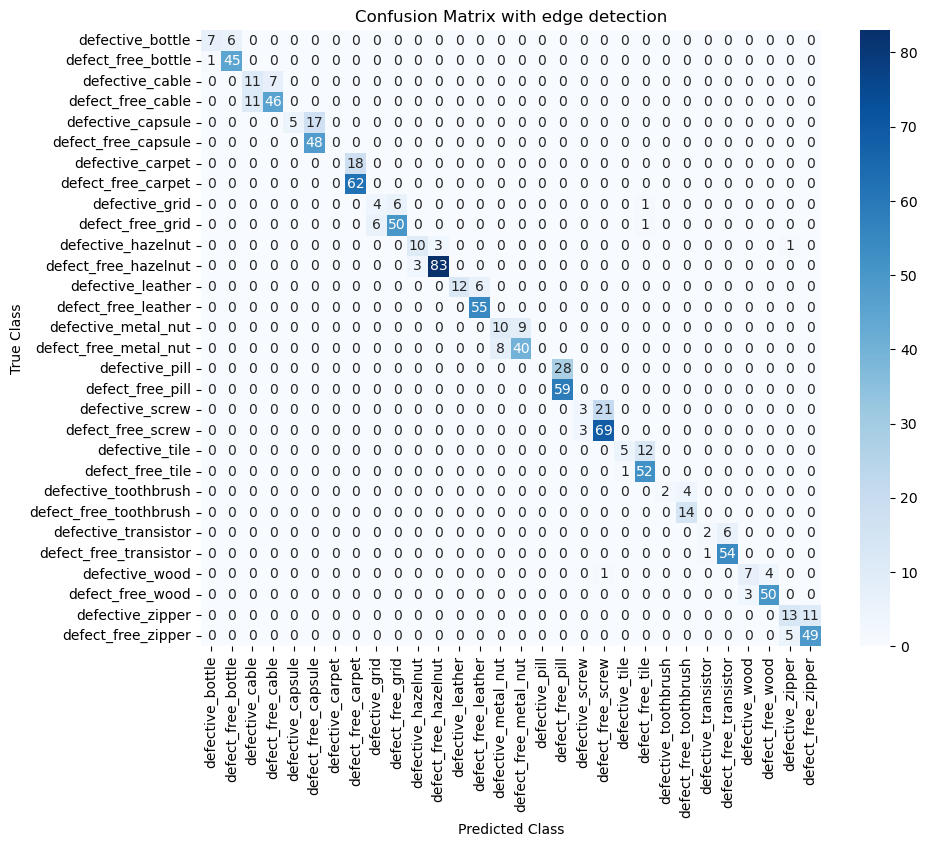

In [10]:
y_pred_ed = model_combined.predict(x_test_combined)
y_pred_classes_ed = np.argmax(y_pred_ed, axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes_ed)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=mapping_dict.keys(), yticklabels=mapping_dict.keys())
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix with edge detection')
plt.show()

In [105]:
report = classification_report(y_true_classes, y_pred_classes_ed, target_names=mapping_dict.keys() ,output_dict=True)
report=pd.DataFrame(report).transpose()
report

c:\Users\Derek Duan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Derek Duan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Derek Duan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
defective_bottle,0.875000,0.538462,0.666667,13.000000
defect_free_bottle,0.882353,0.978261,0.927835,46.000000
defective_cable,0.500000,0.611111,0.550000,18.000000
defect_free_cable,0.867925,0.807018,0.836364,57.000000
defective_capsule,1.000000,0.227273,0.370370,22.000000
defect_free_capsule,0.738462,1.000000,0.849558,48.000000
defective_carpet,0.000000,0.000000,0.000000,18.000000
defect_free_carpet,0.775000,1.000000,0.873239,62.000000
defective_grid,0.400000,0.363636,0.380952,11.000000
defect_free_grid,0.892857,0.877193,0.884956,57.000000


In [11]:
precision = precision_score(y_true_classes, y_pred_classes_ed, average='macro')
recall = recall_score(y_true_classes, y_pred_classes_ed, average='macro')
f1 = f1_score(y_true_classes, y_pred_classes_ed, average='macro')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.7322775663958203
Recall: 0.6669403041343261
F1 Score: 0.6678647933476768


c:\Users\Derek Duan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Insights: While edge detection can highlight structural differences, it might not be enough to capture the more subtle defects that exist in the objects, such as scratches, or other minor issues. Edge detection is very good for finding boundaries, but defects might not always be well-captured by this technique

In [15]:
y_pred_filtered_ed=y_pred_classes_ed[~np.isin(y_true_defective, -1)]

# Calculate accuracy
accuracy = accuracy_score(y_true_filtered, y_pred_filtered_ed)
print(f"the accuracy score for defective classes is: {accuracy:.2%}")

precision = precision_score(y_true_filtered, y_pred_filtered_ed, average='macro')
recall = recall_score(y_true_filtered, y_pred_filtered_ed, average='macro')
f1 = f1_score(y_true_filtered, y_pred_filtered_ed, average='macro')

print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1 Score: {f1:.2%}")

the accuracy score for defective classes is: 36.11%
Precision: 43.10%
Recall: 19.25%
F1 Score: 25.61%


c:\Users\Derek Duan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Derek Duan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [110]:
# Calculate precision for each class in y_true_filtered array only
precision = precision_score(y_true_filtered, y_pred_filtered_ed, average=None, labels=np.unique(y_true_filtered))

# Calculate recall for each class in y_true_filtered array only
recall = recall_score(y_true_filtered, y_pred_filtered_ed, average=None, labels=np.unique(y_true_filtered))

# Calculate F1 score for each class in y_true_filtered array only
f1 = f1_score(y_true_filtered, y_pred_filtered_ed, average=None, labels=np.unique(y_true_filtered))

results_df = pd.DataFrame({
     "Class": [mapping_dict_inv[i] for i in np.unique(y_true_filtered)],
     "Precision": precision,
     "Recall": recall,
     "F1 Score": f1
})

pd.DataFrame(results_df)

c:\Users\Derek Duan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Class,Precision,Recall,F1 Score
0,defective_bottle,1.000000,0.538462,0.700000
1,defective_cable,1.000000,0.611111,0.758621
2,defective_capsule,1.000000,0.227273,0.370370
3,defective_carpet,0.000000,0.000000,0.000000
4,defective_grid,1.000000,0.363636,0.533333
5,defective_hazelnut,1.000000,0.714286,0.833333
6,defective_leather,1.000000,0.666667,0.800000
7,defective_metal_nut,1.000000,0.526316,0.689655
8,defective_pill,0.000000,0.000000,0.000000
9,defective_screw,1.000000,0.125000,0.222222


with texture features

In [16]:
from skimage.color import rgb2gray
from skimage.feature import local_binary_pattern

def apply_lbp(images):
    lbp_images = np.zeros((images.shape[0], images.shape[1], images.shape[2]))
    for i in range(images.shape[0]):
        gray_image = rgb2gray(images[i])
        lbp = local_binary_pattern(gray_image, P=8, R=1, method='uniform')
        lbp_normalized = (lbp - lbp.min()) / (lbp.max() - lbp.min())
        lbp_images[i] = lbp_normalized
    return lbp_images

x_train_lbp = apply_lbp(x_train)
x_test_lbp = apply_lbp(x_test)

In [17]:
x_train_lbp = x_train_lbp.reshape(x_train_lbp.shape[0], 128, 128, 1)
x_test_lbp = x_test_lbp.reshape(x_test_lbp.shape[0], 128, 128, 1)

x_train_combined_lbp = np.concatenate([x_train, x_train_lbp], axis=-1)
x_test_combined_lbp = np.concatenate([x_test, x_test_lbp], axis=-1)

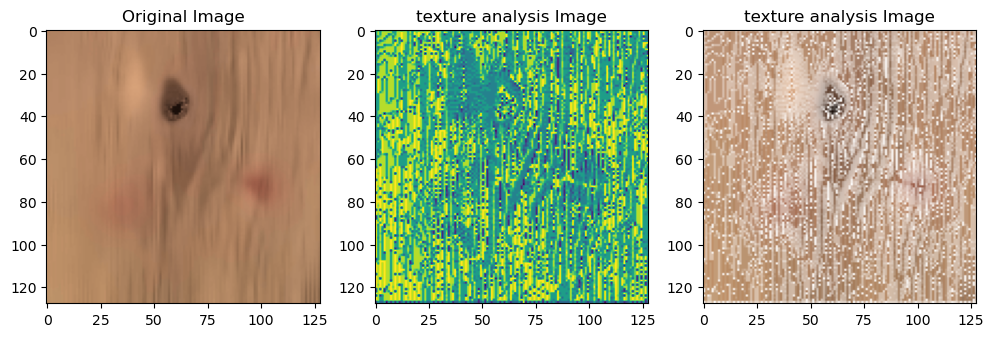

In [ ]:
plt.figure(figsize=(12,5))
i=510

plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(x_test[i])

plt.subplot(1,3,2)
plt.title("texture analysis Image")
plt.imshow(x_test_lbp[i])

plt.subplot(1,3,3)
plt.title("transformed Image")
plt.imshow(x_test_combined_lbp[i], cmap='gray')

plt.show()

In [18]:
model_combined.fit(x_train_combined_lbp, y_train, epochs=10, batch_size=16, validation_data=(x_test_combined_lbp, y_test))

Epoch 1/10
268/268 [==============================] - 33s 119ms/step - loss: 0.7948 - accuracy: 0.7000 - val_loss: 0.5579 - val_accuracy: 0.7572
Epoch 2/10
268/268 [==============================] - 34s 126ms/step - loss: 0.5355 - accuracy: 0.7600 - val_loss: 0.5255 - val_accuracy: 0.7675
Epoch 3/10
268/268 [==============================] - 30s 111ms/step - loss: 0.4885 - accuracy: 0.7817 - val_loss: 0.5308 - val_accuracy: 0.7572
Epoch 4/10
268/268 [==============================] - 29s 107ms/step - loss: 0.4460 - accuracy: 0.7985 - val_loss: 0.5233 - val_accuracy: 0.7796
Epoch 5/10
268/268 [==============================] - 28s 106ms/step - loss: 0.4219 - accuracy: 0.8118 - val_loss: 0.5873 - val_accuracy: 0.7796
Epoch 6/10
268/268 [==============================] - 29s 109ms/step - loss: 0.3714 - accuracy: 0.8298 - val_loss: 0.5807 - val_accuracy: 0.7778
Epoch 7/10
268/268 [==============================] - 36s 133ms/step - loss: 0.3413 - accuracy: 0.8489 - val_loss: 0.5730 - val_ac

34/34 [==============================] - 2s 44ms/step


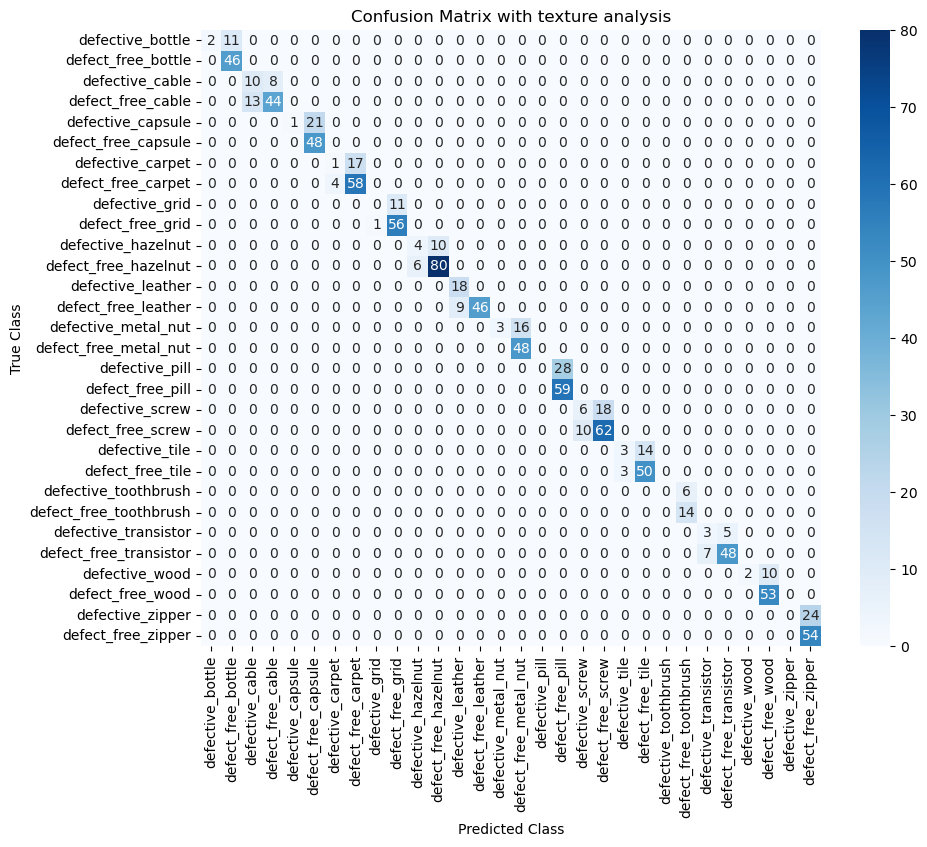

In [19]:
y_pred_lbp = model_combined.predict(x_test_combined_lbp)
y_pred_classes_lbp = np.argmax(y_pred_lbp, axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes_lbp)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=mapping_dict.keys(), yticklabels=mapping_dict.keys())
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix with texture analysis')
plt.show()

In [200]:
report = classification_report(y_true_classes, y_pred_classes_lbp, target_names=mapping_dict.keys() ,output_dict=True)
report=pd.DataFrame(report).transpose()
report

c:\Users\Derek Duan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Derek Duan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Derek Duan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
defective_bottle,1.000000,0.307692,0.470588,13.000000
defect_free_bottle,0.836364,1.000000,0.910891,46.000000
defective_cable,0.700000,0.388889,0.500000,18.000000
defect_free_cable,0.830769,0.947368,0.885246,57.000000
defective_capsule,0.529412,0.409091,0.461538,22.000000
defect_free_capsule,0.754717,0.833333,0.792079,48.000000
defective_carpet,0.000000,0.000000,0.000000,18.000000
defect_free_carpet,0.775000,1.000000,0.873239,62.000000
defective_grid,0.500000,0.090909,0.153846,11.000000
defect_free_grid,0.848485,0.982456,0.910569,57.000000


In [20]:
precision = precision_score(y_true_classes, y_pred_classes_lbp, average='macro')
recall = recall_score(y_true_classes, y_pred_classes_lbp, average='macro')
f1 = f1_score(y_true_classes, y_pred_classes_lbp, average='macro')

print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1 Score: {f1:.2%}")

Precision: 62.82%
Recall: 57.85%
F1 Score: 54.62%


c:\Users\Derek Duan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
y_pred_filtered_lbp=y_pred_classes_lbp[~np.isin(y_true_defective, -1)]

# Calculate accuracy
accuracy = accuracy_score(y_true_filtered, y_pred_filtered_lbp)
print(f"the accuracy score for defective classes is: {accuracy:.2%}")

precision = precision_score(y_true_filtered, y_pred_filtered_lbp, average='macro')
recall = recall_score(y_true_filtered, y_pred_filtered_lbp, average='macro')
f1 = f1_score(y_true_filtered, y_pred_filtered_lbp, average='macro')

print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1 Score: {f1:.2%}")

the accuracy score for defective classes is: 21.03%
Precision: 37.93%
Recall: 11.11%
F1 Score: 15.25%


c:\Users\Derek Duan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Derek Duan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
x_train_final = np.concatenate([x_train_combined_lbp, x_train_edges], axis=-1)
x_test_final = np.concatenate([x_test_combined_lbp, x_test_edges], axis=-1)

In [8]:
model_combined = Sequential()

model_combined.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 5)))
model_combined.add(MaxPooling2D((2, 2)))
model_combined.add(Conv2D(64, (3, 3), activation='relu'))
model_combined.add(MaxPooling2D((2, 2)))
model_combined.add(Conv2D(128, (3, 3), activation='relu'))
model_combined.add(MaxPooling2D((2, 2)))

model_combined.add(Flatten())
model_combined.add(Dense(128, activation='relu'))
model_combined.add(Dropout(0.3))
model_combined.add(Dense(30, activation='softmax'))

model_combined.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model_combined.fit(x_train_final, y_train, epochs=10, batch_size=16, validation_data=(x_test_final, y_test))

Epoch 1/10
268/268 [==============================] - 32s 115ms/step - loss: 1.2438 - accuracy: 0.6257 - val_loss: 0.6603 - val_accuracy: 0.7582
Epoch 2/10
268/268 [==============================] - 29s 109ms/step - loss: 0.6803 - accuracy: 0.7268 - val_loss: 0.5559 - val_accuracy: 0.7712
Epoch 3/10
268/268 [==============================] - 30s 111ms/step - loss: 0.6063 - accuracy: 0.7565 - val_loss: 0.5224 - val_accuracy: 0.7470
Epoch 4/10
268/268 [==============================] - 30s 113ms/step - loss: 0.5541 - accuracy: 0.7635 - val_loss: 0.5047 - val_accuracy: 0.7526
Epoch 5/10
268/268 [==============================] - 29s 107ms/step - loss: 0.5227 - accuracy: 0.7700 - val_loss: 0.5140 - val_accuracy: 0.7806
Epoch 6/10
268/268 [==============================] - 29s 109ms/step - loss: 0.5151 - accuracy: 0.7763 - val_loss: 0.5145 - val_accuracy: 0.7806
Epoch 7/10
268/268 [==============================] - 31s 117ms/step - loss: 0.4719 - accuracy: 0.7966 - val_loss: 0.4732 - val_ac

34/34 [==============================] - 1s 38ms/step


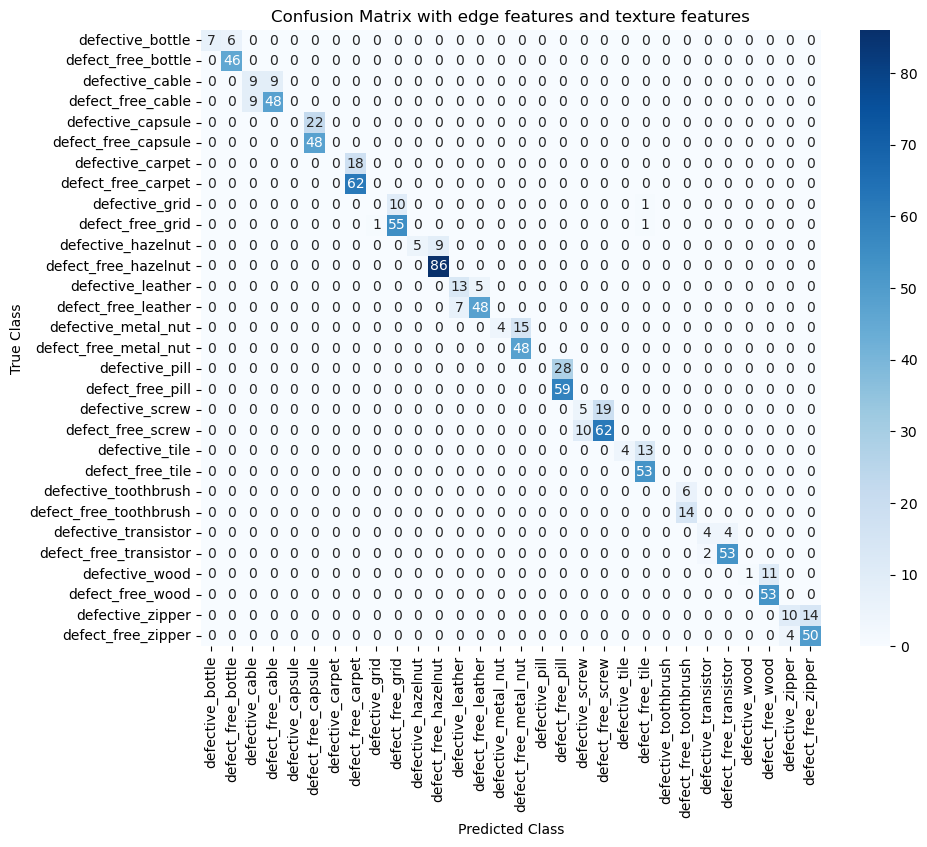

In [13]:
y_pred_final = model_combined.predict(x_test_final)
y_pred_classes_final = np.argmax(y_pred_final, axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes_final)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=mapping_dict.keys(), yticklabels=mapping_dict.keys())
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix with edge features and texture features')
plt.show()

In [19]:
report = classification_report(y_true_classes, y_pred_classes_final, target_names=mapping_dict.keys() ,output_dict=True)
report=pd.DataFrame(report).transpose()
report

c:\Users\Derek Duan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Derek Duan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Derek Duan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
defective_bottle,1.000000,0.538462,0.700000,13.00000
defect_free_bottle,0.884615,1.000000,0.938776,46.00000
defective_cable,0.500000,0.500000,0.500000,18.00000
defect_free_cable,0.842105,0.842105,0.842105,57.00000
defective_capsule,0.000000,0.000000,0.000000,22.00000
defect_free_capsule,0.685714,1.000000,0.813559,48.00000
defective_carpet,0.000000,0.000000,0.000000,18.00000
defect_free_carpet,0.775000,1.000000,0.873239,62.00000
defective_grid,0.000000,0.000000,0.000000,11.00000
defect_free_grid,0.846154,0.964912,0.901639,57.00000


Data Augmentation

Limitations of Data Augmentation
The biases in the original dataset persist in the augmented data.

In [8]:
mat=so.loadmat('data_with_edge_detection.mat')
x_train_combined=mat['x_train']
x_test_combined=mat['x_test']

In [48]:
datagen = ImageDataGenerator(
    rotation_range=60,
    width_shift_range=0.3,
    height_shift_range=0.4,
    shear_range=0.1,
    zoom_range=0.8,
    horizontal_flip=True,
    fill_mode='nearest'
)

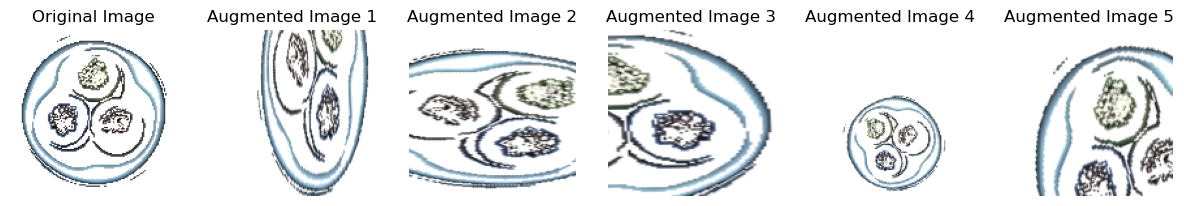

In [50]:
def plot_augmented_images(datagen, dataset, img_index ,num_images=5):
    original_image = dataset[img_index]
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, num_images + 1, 1)
    plt.imshow(original_image)
    plt.title('Original Image')
    plt.axis('off')
    
    # Generate augmented images and plot them
    for i, augmented_image in enumerate(datagen.flow(np.expand_dims(original_image, axis=0), batch_size=1)):
        if i >= num_images:
            break
        # Convert the augmented image to uint8
        augmented_image_uint8 = (augmented_image[0] * 255).astype('uint8')
        plt.subplot(1, num_images + 1, i + 2)
        plt.imshow(augmented_image_uint8)
        plt.title(f'Augmented Image {i + 1}')
        plt.axis('off')
    plt.show()

plot_augmented_images(datagen, x_test_combined, 3)

In [51]:
datagen.fit(x_train_combined)

model_combined = Sequential()
model_combined.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 4)))
model_combined.add(MaxPooling2D((2, 2)))
model_combined.add(Conv2D(64, (3, 3), activation='relu'))
model_combined.add(MaxPooling2D((2, 2)))
model_combined.add(Conv2D(128, (3, 3), activation='relu'))
model_combined.add(MaxPooling2D((2, 2)))
model_combined.add(Flatten())
model_combined.add(Dense(128, activation='relu'))
model_combined.add(Dropout(0.3))
model_combined.add(Dense(30, activation='softmax'))

model_combined.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model_combined.fit(datagen.flow(x_train_combined, y_train, batch_size=32),
                   steps_per_epoch=len(x_train_combined) // 32,
                   epochs=10,
                   validation_data=(x_test_combined, y_test))


Epoch 1/10
133/133 [==============================] - 34s 247ms/step - loss: 1.9489 - accuracy: 0.4357 - val_loss: 1.0326 - val_accuracy: 0.6545
Epoch 2/10
133/133 [==============================] - 32s 241ms/step - loss: 1.0499 - accuracy: 0.6450 - val_loss: 0.7648 - val_accuracy: 0.7246
Epoch 3/10
133/133 [==============================] - 32s 238ms/step - loss: 0.8740 - accuracy: 0.6822 - val_loss: 0.6450 - val_accuracy: 0.7479
Epoch 4/10
133/133 [==============================] - 33s 245ms/step - loss: 0.7705 - accuracy: 0.7003 - val_loss: 0.6827 - val_accuracy: 0.7330
Epoch 5/10
133/133 [==============================] - 31s 231ms/step - loss: 0.7327 - accuracy: 0.7100 - val_loss: 0.6491 - val_accuracy: 0.7264
Epoch 6/10
133/133 [==============================] - 32s 241ms/step - loss: 0.7205 - accuracy: 0.7161 - val_loss: 0.6024 - val_accuracy: 0.7068
Epoch 7/10
133/133 [==============================] - 29s 219ms/step - loss: 0.6986 - accuracy: 0.7212 - val_loss: 0.6184 - val_ac

34/34 [==============================] - 2s 46ms/step


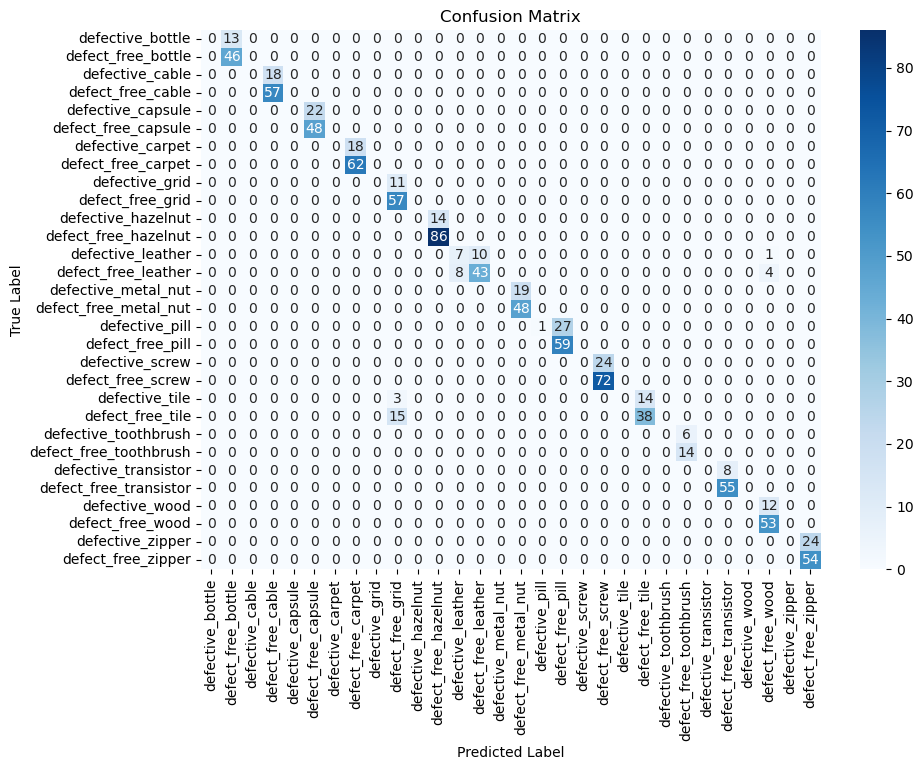

In [52]:
# Predict on the test set
y_pred_da = model_combined.predict(x_test_combined)

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred_da, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=mapping_dict.keys(), yticklabels=mapping_dict.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [55]:
report = classification_report(y_test_labels, y_pred_labels, target_names=mapping_dict.keys() ,output_dict=True)
report=pd.DataFrame(report).transpose()
report

c:\Users\Derek Duan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Derek Duan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Derek Duan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
defective_bottle,0.000000,0.000000,0.000000,13.000000
defect_free_bottle,0.779661,1.000000,0.876190,46.000000
defective_cable,0.000000,0.000000,0.000000,18.000000
defect_free_cable,0.760000,1.000000,0.863636,57.000000
defective_capsule,0.000000,0.000000,0.000000,22.000000
defect_free_capsule,0.685714,1.000000,0.813559,48.000000
defective_carpet,0.000000,0.000000,0.000000,18.000000
defect_free_carpet,0.775000,1.000000,0.873239,62.000000
defective_grid,0.000000,0.000000,0.000000,11.000000
defect_free_grid,0.662791,1.000000,0.797203,57.000000


ISOMAP

In [64]:
y_train.shape

(4283, 30)

c:\Users\Derek Duan\anaconda3\lib\site-packages\sklearn\manifold\_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 16 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Users\Derek Duan\anaconda3\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\Users\Derek Duan\anaconda3\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\Users\Derek Duan\anaconda3\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\Use

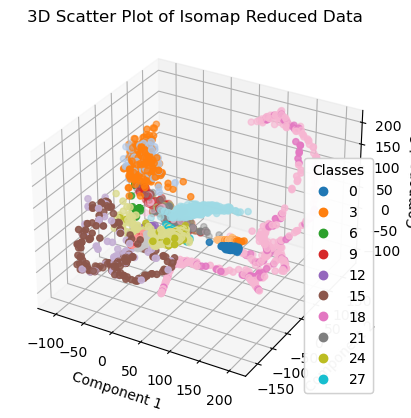

In [ ]:
from sklearn.manifold import Isomap
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder

x_train_flattened = x_train.reshape(4283, -1)
y_train_labels = np.argmax(y_train, axis=1)

# Apply Isomap to reduce to 3 components
isomap = Isomap(n_components=3)
x_train_reduced = isomap.fit_transform(x_train_flattened)

c:\Users\Derek Duan\anaconda3\lib\site-packages\matplotlib\collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


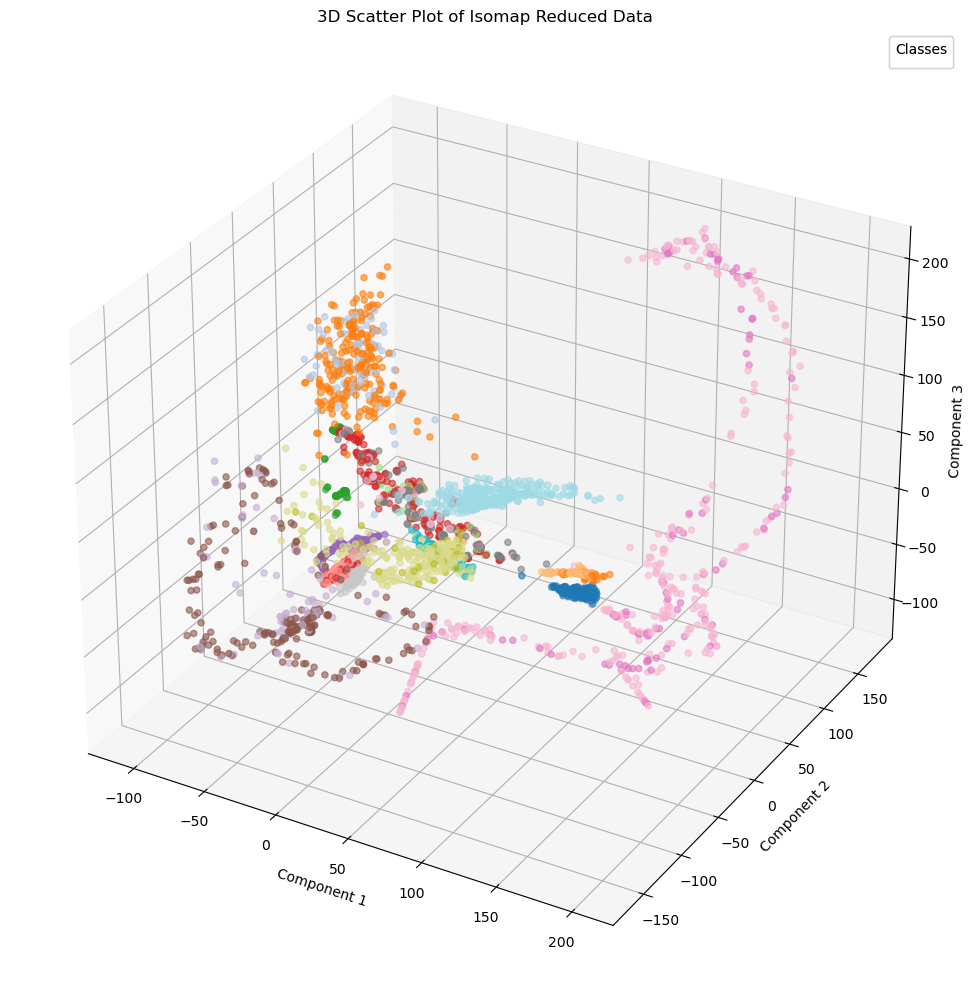

In [108]:
# Create a 3D scatter plot with different colors for each class
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111, projection='3d')

colors = plt.cm.tab20(np.linspace(0, 1, 30))
color_list = [colors[label] for label in y_train_labels]

# Use the custom color list to ensure correct colors for each class
scatter = ax.scatter(x_train_reduced[:, 0], x_train_reduced[:, 1], x_train_reduced[:, 2], c=color_list, marker='o', alpha=0.6)
# Create a custom legend
handles, labels = scatter.legend_elements()
class_labels = [key for key, value in sorted(mapping_dict.items(), key=lambda item: item[1])]
legend1 = ax.legend(handles, class_labels, title="Classes")

ax.add_artist(legend1)

ax.set_title('3D Scatter Plot of Isomap Reduced Data')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

# Adjust the aspect ratio of the plot
ax.set_box_aspect([0.1,0.1,0.08])  # Aspect ratio is 1:1:1

plt.tight_layout()

plt.show()

In [109]:
legend1

In [58]:
from sklearn.manifold import Isomap

x_train_flattened = x_train.reshape(x_train.shape[0], -1)
x_test_flattened = x_test.reshape(x_test.shape[0], -1)

# Apply Isomap to reduce dimensionality
isomap = Isomap(n_components=64)
x_train_isomap = isomap.fit_transform(x_train_flattened)
x_test_isomap = isomap.transform(x_test_flattened)

# Reshape the reduced data back to image format for CNN input
x_train_isomap_reshaped = x_train_isomap.reshape(x_train.shape[0], 8, 8, 1)
x_test_isomap_reshaped = x_test_isomap.reshape(x_test.shape[0], 8, 8, 1)

# Define the model architecture
model_combined = Sequential()
model_combined.add(Conv2D(32, (3, 3), activation='relu', input_shape=(8, 8, 1)))
model_combined.add(MaxPooling2D((2, 2)))
model_combined.add(Conv2D(64, (3, 3), activation='relu'))
model_combined.add(MaxPooling2D((2, 2)))
model_combined.add(Flatten())
model_combined.add(Dense(128, activation='relu'))
model_combined.add(Dropout(0.3))
model_combined.add(Dense(30, activation='softmax'))

# Compile the model
model_combined.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using the reduced data
model_combined.fit(x_train_isomap_reshaped, y_train,
                   epochs=10,
                   batch_size=32,
                   validation_data=(x_test_isomap_reshaped, y_test))

c:\Users\Derek Duan\anaconda3\lib\site-packages\sklearn\manifold\_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 16 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Users\Derek Duan\anaconda3\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\Users\Derek Duan\anaconda3\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\Users\Derek Duan\anaconda3\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\Use

ValueError: Exception encountered when calling layer "max_pooling2d_9" (type MaxPooling2D).

Negative dimension size caused by subtracting 2 from 1 for '{{node max_pooling2d_9/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](Placeholder)' with input shapes: [?,1,1,64].

Call arguments received by layer "max_pooling2d_9" (type MaxPooling2D):
  • inputs=tf.Tensor(shape=(None, 1, 1, 64), dtype=float32)

In [57]:
x_train_isomap_reshaped.shape

(4283, 10, 10, 1)

In [ ]:
#plot confusion matrix
y_pred_iso = model_combined.predict(x_test_isomap_reshaped)
y_pred_classes_iso = np.argmax(y_pred_iso, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes_iso)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=mapping_dict.keys(), yticklabels=mapping_dict.keys())
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()